In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [3]:
folder = Path('D:/ProgProjekte/Python/Results-Exact-Study/Patches')

In [4]:
path = folder/"GroundTruth"

In [5]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      #max_lighting=0.0, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [6]:
def get_data(bs,size):
    data = ImageDataBunch.from_folder(path, train="train", valid="val", size=size, bs=bs, ds_tfms=tfms, num_workers=0)
    return data.normalize()

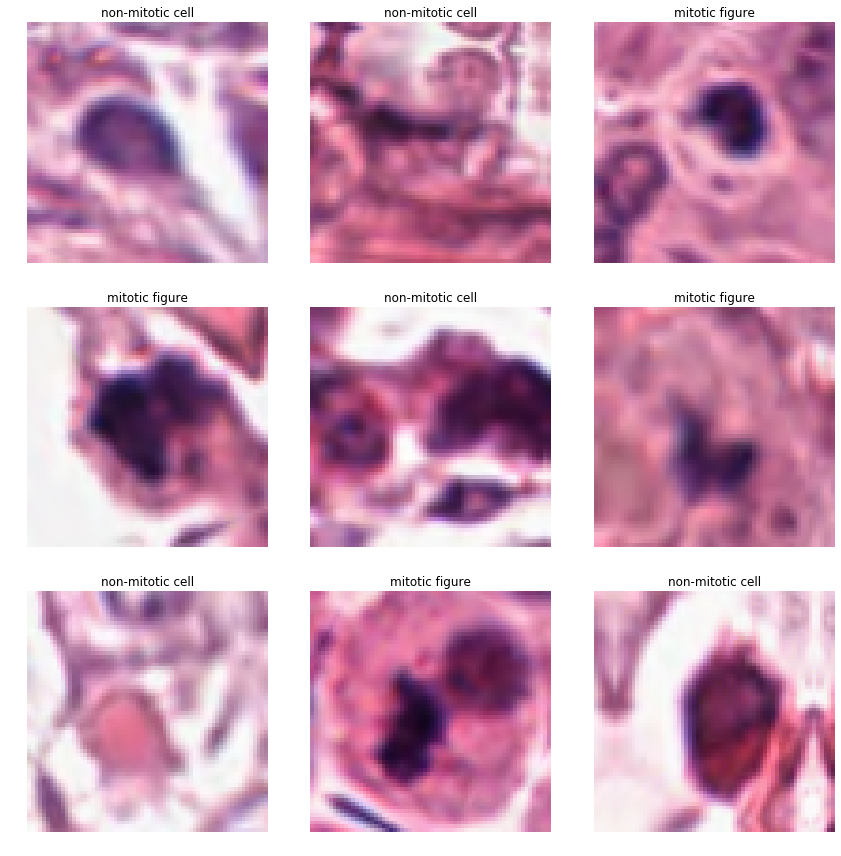

In [7]:
data = get_data(64,64)
fig = data.show_batch(3, return_fig=True)

In [8]:
acc_values = []
for i in range(5):
    learn = cnn_learner(get_data(bs=64, size=64), models.resnet18, metrics=[accuracy], callback_fns=[])
    
    lr = 0.05
    learn.fit_one_cycle(3, slice(lr))
    learn.unfreeze()
    
    lr = 0.001
    learn.fit_one_cycle(5, slice(lr))
        
    acc_values.append(float(np.max(learn.recorder.metrics)))  

epoch,train_loss,valid_loss,accuracy,time
0,0.700336,0.745030,0.731159,00:21
1,0.594862,0.625759,0.813273,00:16
2,0.480482,0.397662,0.852081,00:16
3,0.379243,0.383245,0.826772,00:16
4,0.317499,0.336433,0.861642,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.724138,0.827600,0.736783,00:16
1,0.610933,0.773296,0.804837,00:16
2,0.481118,0.415572,0.865017,00:16
3,0.384901,0.358805,0.853768,00:16
4,0.306225,0.366449,0.849831,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.688944,0.844374,0.714286,00:15
1,0.572276,0.832516,0.802025,00:16
2,0.459887,0.427741,0.845894,00:18
3,0.349514,0.334219,0.881890,00:18
4,0.297547,0.351326,0.866142,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.681950,0.892328,0.713723,00:17
1,0.651859,0.845437,0.797525,00:16
2,0.518340,0.392695,0.881890,00:17
3,0.374810,0.290605,0.880765,00:19
4,0.294709,0.327151,0.859393,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.706570,1.105885,0.692913,00:17
1,0.637020,1.065336,0.763217,00:17
2,0.489240,0.501657,0.847019,00:17
3,0.386847,0.305134,0.870079,00:18
4,0.305502,0.276455,0.886389,00:18


In [12]:
np.mean(acc_values)

0.8753655791282654

In [13]:
acc_values

[0.8616423010826111,
 0.8650168776512146,
 0.8818897604942322,
 0.8818897604942322,
 0.8863891959190369]